# Glass Identification
**Identifying the type of glass based on its chemical properties**

In [651]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data

**Attribute Information:**
1. RI: refractive index
2. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
3. Mg: Magnesium
4. Al: Aluminum
5. Si: Silicon
6. K: Potassium
7. Ca: Calcium
8. Ba: Barium
9. Fe: Iron
10. Type of glass: (class attribute)
-- 1: building_windows_float_processed
-- 2: building_windows_non_float_processed
-- 3: vehicle_windows_float_processed
-- 4: vehicle_windows_non_float_processed (none in this database)
-- 5: containers
-- 6: tableware
-- 7: headlamps


In [652]:
data = pd.read_csv("data/glass-data.csv")
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [653]:
print(f"Total data entries: {len(data)}")

Total data entries: 214


## Model

In [654]:
from sklearn.impute import SimpleImputer

data = data.replace(0, np.nan)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data_imputed = imputer.fit_transform(data)

In [655]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_imputed, data["Type"], test_size=0.2)

In [656]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Performance

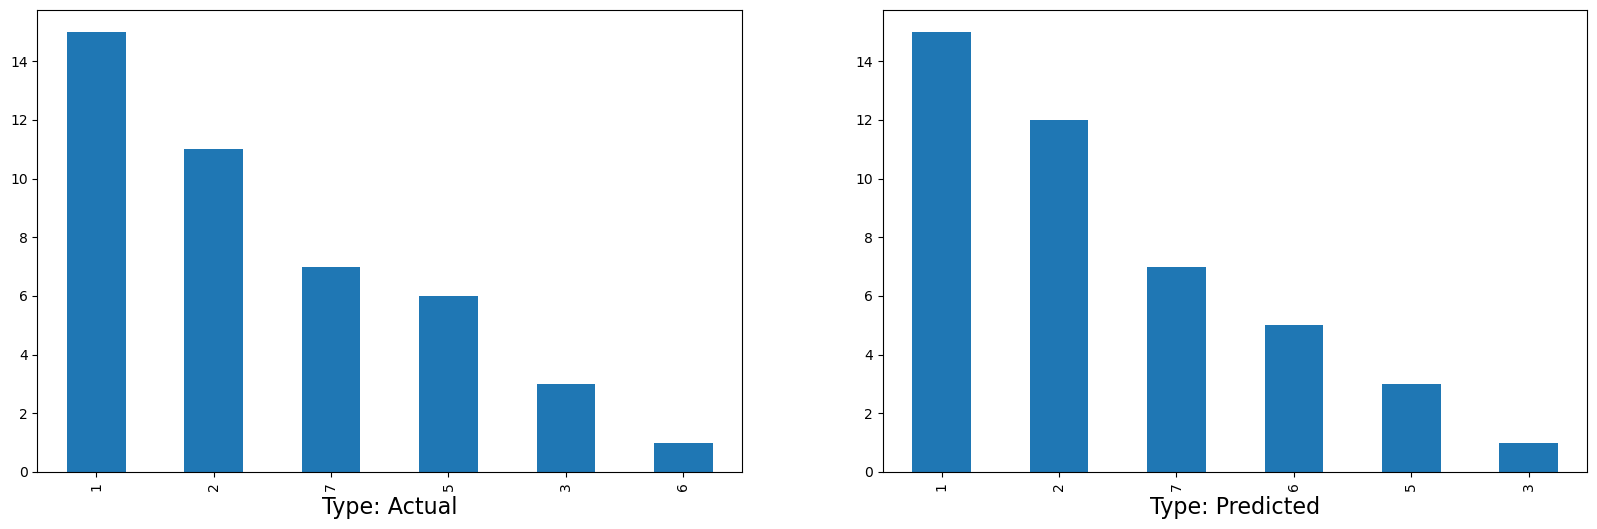

In [657]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
pd.value_counts(y_test, sort=True).plot.bar()
plt.xlabel("Type: Actual", fontsize=16)

plt.subplot(1, 2, 2)
pd.value_counts(y_pred, sort=True).plot.bar()
plt.xlabel("Type: Predicted", fontsize=16)

plt.show()

In [658]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8372093023255814
